In [7]:
import tensorflow as tf
import tensorflow.keras as k
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as skl

In [11]:
#loading data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test_mnist, y_test_mnist) = mnist.load_data()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [26]:
#splitting data into train, validation and test
x_train, x_test, y_train, y_test = skl.train_test_split(x_train, y_train, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = skl.train_test_split(x_train, y_train, test_size=0.2, random_state=1)

#reshaping the matrices of test, validation test
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

print("shape of x_train: " + str(x_train.shape))
print("shape of x_val: " + str(x_val.shape))
print("shape of x_test: " + str(x_test.shape))

shape of x_train: (24576, 28, 28, 1)
shape of x_train: (24576, 28, 28, 1)
shape of x_val: (6144, 28, 28, 1)
shape of x_test: (7680, 28, 28, 1)


In [16]:
#defining our sequential model Architecture 
#with Convolution layers fllowed by one pooling layer (max) and in end one Dense layer with softmaxactvation

model = k.models.Sequential()

#model.add(k.layers.Flatten())
model.add(k.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28,28,1)))
model.add(k.layers.Conv2D(32, kernel_size=(3, 3), activation=tf.nn.relu))
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(k.layers.Flatten())
model.add(k.layers.Dense(10, activation=tf.nn.softmax))

In [17]:
#compiling our model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
#fitting moel with generated validation dataset

model.fit(x_train, y_train, epochs=3, validation_data=(x_val, y_val))

Train on 38400 samples, validate on 9600 samples
Epoch 1/3
38400/38400 [==============================] - 23s 609us/sample - loss: 0.8107 - acc: 0.9128 - val_loss: 0.0913 - val_acc: 0.9723
Epoch 2/3
38400/38400 [==============================] - 23s 595us/sample - loss: 0.0747 - acc: 0.9771 - val_loss: 0.1298 - val_acc: 0.9654
Epoch 3/3
38400/38400 [==============================] - 23s 602us/sample - loss: 0.0547 - acc: 0.9828 - val_loss: 0.1062 - val_acc: 0.9749


In [19]:
#evaluate model with test data

val_loss, val_acc = model.evaluate(x_test, y_test)

12000/12000 [==============================] - 2s 167us/sample - loss: 0.1153 - acc: 0.9743


In [20]:
model.save('detect_digit.model')

In [21]:
my_model = k.models.load_model('detect_digit.model')

In [22]:
predictions = my_model.predict([x_test])

In [24]:
np.argmax(predictions[0])

3

TypeError: Invalid dimensions for image data

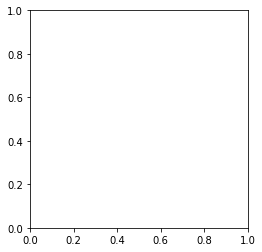

In [25]:
plt.imshow(x_test[0])